### ¿Geopandas?

Geopandas enables the use and manipulation of geospatial data in Python. It extends the common datatype used in pandas to allow for the many and unique geometric operations: GeoSeries and GeoDataFrame. Geopandas is also built on top of shapely for its geometric operation; its underlying datatype allows Geopandas to run blazingly fast and is appropriate for many machine learning pipelines that require large geospatial datasets.

### Instalation 

Following steps:

#### 1. create new environment

conda creare -name new_env

#### 2. Activate new environment
conda activate new_env

#### 3. Install package 

conda install -c conda-forge geopandas

### Geopandas data types

Shapefile (.shp): vector data that stores geospatial information such as topology, shape geometry, coordinate etc

GeoJSON (.geojson): geospatial information and relevant characteristics (object or string)

Finally, Geopandas creates an additional geometry column


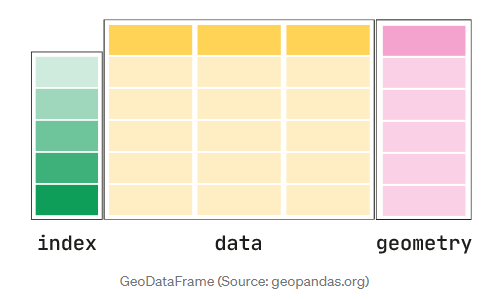


### Coordinate Reference Systems (crs)

The coordinate reference systems tell us how GeodataFrame o GeoSeries relate to places on Earth

#### relevant operations: setting a projection and re-projecting 

setting projection: geopandas.read_file() most of time includes projection information. Check using "Geoseries.crs"
If GeoDataframe does not include projection, hence use data["geometry"].set_crs(epsg=4326) for WGS-84.

### WGS-84: 
The Global Positioning System uses the World Geodetic System (WGS84) as its reference coordinate system. It's made up of a reference ellipsoid, a standard coordinate system, altitude data, and a geoid

### Reprojecting:

In somes cases, due to distortions in bidimensional plane and your application of geospatial data, re-projection is required. 

A commonly used default is Universal Transverse Mercator (UTM)







In [94]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt 
import chardet

In [95]:
# objects from Geopandas 

import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Point, LineString

import warnings
warnings.filterwarnings('ignore') # eliminar warning messages 

## Checking CRS

In [96]:
# Border of Switzerland
ch_borders = gpd.read_file( r'../../data/geopandas_data/eu_maps/CHE_adm0.shp')

# Border of Germany
de_borders = gpd.read_file( r'../../data/geopandas_data/eu_maps/gadm36_DEU_0.shp')

# Switzerland lakes shape files
ch_lakes = gpd.GeoDataFrame.from_file( r'../../data/geopandas_data/eu_maps/g2s15.shp')

# muni
Geo_muni = gpd.read_file( r"../../data/geopandas_data/eu_maps/VG250_GEM.shp" )

In [97]:
ch_borders

,ID_0,ISO,NAME_ENGLI,NAME_ISO,NAME_FAO,NAME_LOCAL,NAME_OBSOL,NAME_VARIA,NAME_NONLA,NAME_FRENC,...,CARICOM,EU,CAN,ACP,Landlocked,AOSIS,SIDS,Islands,LDC,geometry
0,223,CHE,Switzerland,SWITZERLAND,Switzerland,Schweiz|Suisse|Svizzera,None,Schweiz|Svizzera|Svizra|Swiss Confederation|Co...,None,Suisse,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((10.22766 46.61207, 10.22734 46..."


Plots with different CRS

(-46058.36469219931, 967356.691928138, -305024.0777151486, 6406513.607306512)

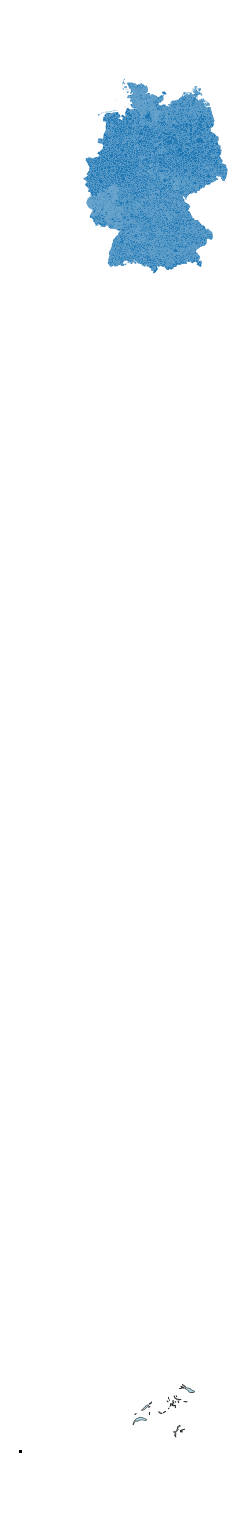

In [98]:

fig = plt.figure(figsize=(40, 20), dpi=100)
ax = fig.add_subplot(111, frame_on = False )

# German Plot
Geo_muni.plot( ax = ax )

# switzerland borders
ch_borders.geometry.boundary.plot(color = 'black', ax=ax, edgecolor='0.2', linewidth=1.5) 

# # Swiss lakes
ch_lakes.plot(color='lightblue' , ax=ax, edgecolor='0.2', linewidth=0.4, legend=True)

ax.axis('off')



### Check CRS

In [99]:
shp_files = [ ch_borders, de_borders, ch_lakes, Geo_muni ]

In [100]:
for shp in shp_files:
    print( shp.crs )

epsg:4326
epsg:4326
epsg:21781
epsg:25832


In [104]:
de_borders.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [106]:
ch_lakes.crs

<Derived Projected CRS: EPSG:21781>
Name: CH1903 / LV03
Axis Info [cartesian]:
- Y[east]: Easting (metre)
- X[north]: Northing (metre)
Area of Use:
- name: Liechtenstein; Switzerland.
- bounds: (5.96, 45.82, 10.49, 47.81)
Coordinate Operation:
- name: Swiss Oblique Mercator 1903M
- method: Hotine Oblique Mercator (variant B)
Datum: CH1903
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

### Reproject CRS

In [28]:
Geo_muni_crs = Geo_muni.to_crs( 21781 )

In [29]:
ch_borders_crs = ch_borders.to_crs( 21781 )

(453126.0049465788, 1163640.4776774019, 11798.918320549732, 1157415.473468453)

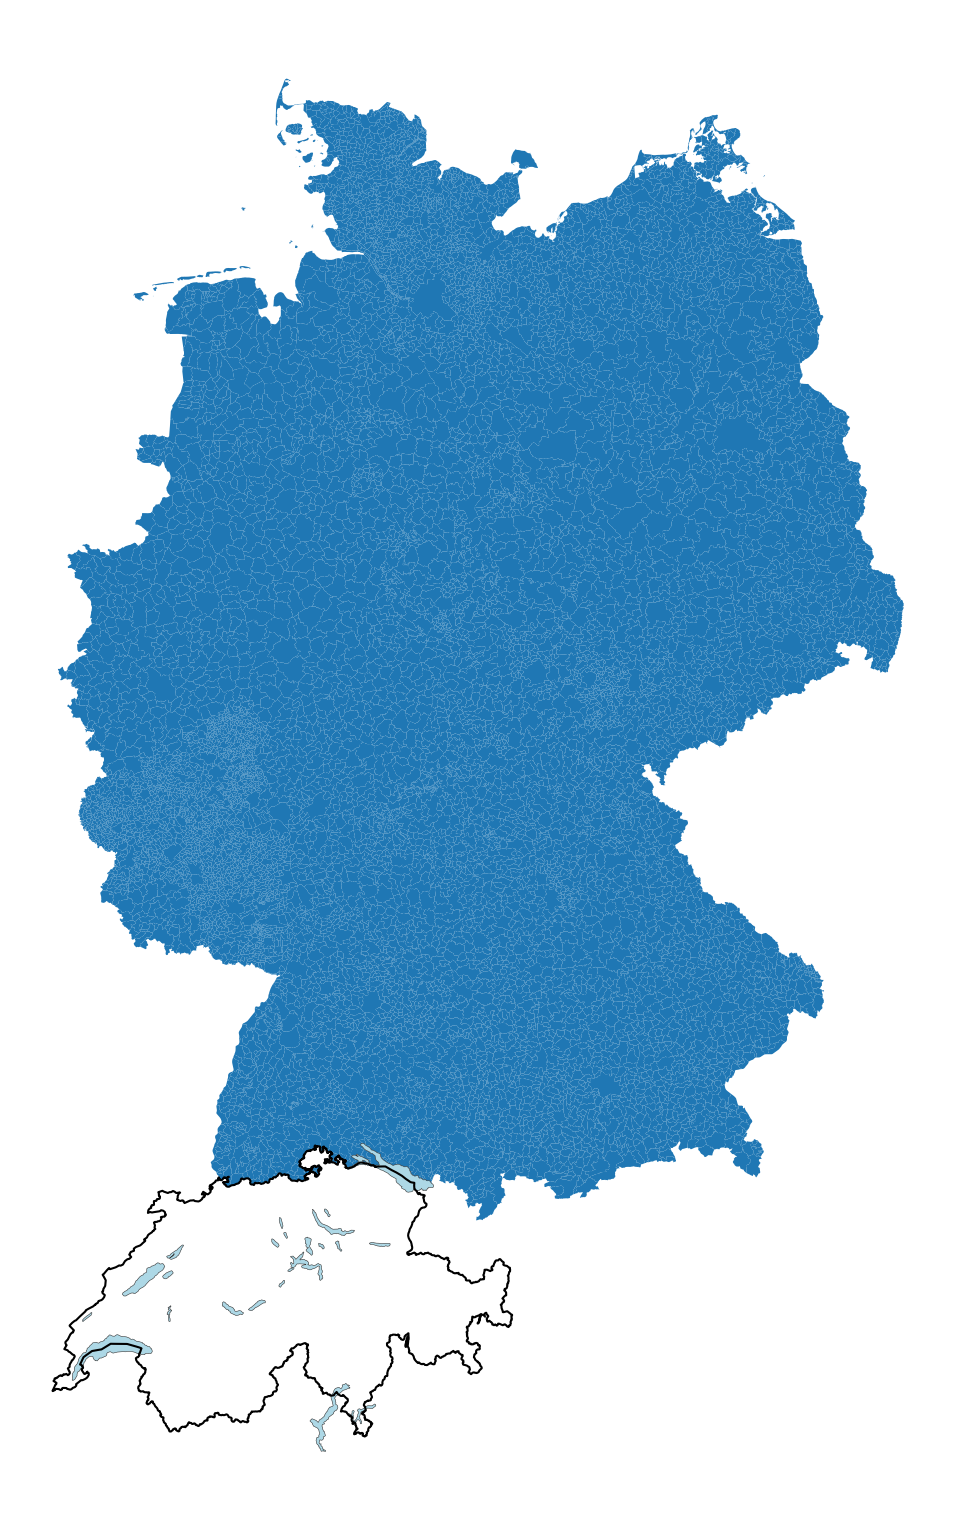

In [30]:

fig = plt.figure(figsize=(40, 20), dpi=100)
ax = fig.add_subplot(111, frame_on = False )

# German Plot
Geo_muni_crs.plot( ax = ax )

# switzerland borders
ch_borders_crs.geometry.boundary.plot(color = 'black', ax=ax, edgecolor='0.2', linewidth=1.5) 

# # Swiss lakes
ch_lakes.plot(color='lightblue' , ax=ax, edgecolor='0.2', linewidth=0.4, legend=True)

ax.axis('off')



## Datos Perú

In [31]:
# chardet permite reconocer el formato del texto dentro del archivo .csv

base = open(r'../../data/geopandas_data/Datos_panel_distritos.csv', 'rb').read()
det = chardet.detect(base)
charenc = det['encoding']
charenc

'utf-8'

## Covid Data

In [32]:
# Import csv file from panel covid information at distric level
# Panel data from march-2020 to first two wees of january-2022

cv_data = pd.read_csv(r'../../data/geopandas_data/Datos_panel_distritos.csv', encoding = charenc)
cv_data.head( 5 )

,Código,Departamento,Provincia,Distrito,Mes,Año,Casos,Muertes Covid,Muertes totales
0,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,3,2020,0,0,16
1,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,4,2020,47,0,5
2,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,5,2020,165,3,11
3,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,6,2020,119,2,15
4,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,7,2020,175,2,8


In [33]:
cv_data.dtypes

Código              int64
Departamento       object
Provincia          object
Distrito           object
Mes                 int64
Año                 int64
Casos               int64
Muertes Covid       int64
Muertes totales     int64
dtype: object

In [34]:
# rename variable to merge later 
cv_data.rename({'Código':'UBIGEO'}, axis =1 , inplace = True)

In [35]:
cv_data['UBIGEO'] = cv_data['UBIGEO'].astype(str).str.zfill(6)  # int to string y completar 6 digitos

cv_data.head( 5 )

,UBIGEO,Departamento,Provincia,Distrito,Mes,Año,Casos,Muertes Covid,Muertes totales
0,010101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,3,2020,0,0,16
1,010101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,4,2020,47,0,5
2,010101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,5,2020,165,3,11
3,010101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,6,2020,119,2,15
4,010101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,7,2020,175,2,8


## Public Health Centers Data

In [36]:
# import csv file of public health centers: MINSA, ESSALUD and Regional Goverment
# coordinates information (NORTE: longitud) (ESTE: latitud)

health_centers = pd.read_csv(r'../../data/geopandas_data/centros_hospitalarios.csv')
health_centers.head( 5 )

# Latitud (Y) ;  Longitud (X)

,Institución,Código Único,Nombre del establecimiento,Clasificación,Tipo,Departamento,Provincia,Distrito,UBIGEO,Dirección,...,Estado,Situación,Condición,Inspección,NORTE,ESTE,COTA,CAMAS,code1,code2
0,GOBIERNO REGIONAL,2076,SAN PABLO,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,PIURA,TALARA,LA BREA,200703,LAMBAYEQUE S/N NEGRITOS,...,ACTIVADO,,EN FUNCIONAMIENTO,,-81.310632,-4.665043,15.3,NaN,19,1
1,ESSALUD,20628,POSTA MEDICA NEGRITOS,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,PIURA,TALARA,LA BREA,200703,AVENIDA SAN MARTIN Nº 100 NEGRITOS,...,ACTIVADO,,EN FUNCIONAMIENTO,,-81.306508,-4.654384,20.4,NaN,19,1
2,GOBIERNO REGIONAL,2075,NEGRITOS,CENTROS DE SALUD O CENTROS MEDICOS,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,PIURA,TALARA,LA BREA,200703,URB. SUD AMERICA D-14 TALARA,...,ACTIVADO,,EN FUNCIONAMIENTO,,-81.303974,-4.658634,41.6,NaN,4,1
3,GOBIERNO REGIONAL,2077,LOBITOS,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,PIURA,TALARA,LOBITOS,200704,BARRIO PRIMAVERA A- 100 LOBITOS,...,ACTIVADO,,EN FUNCIONAMIENTO,,-81.275139,-4.456625,39.4,NaN,19,1
4,ESSALUD,12243,HOSPITAL II ESSALUD TALARA,HOSPITALES O CLINICAS DE ATENCION GENERAL,ESTABLECIMIENTO DE SALUD CON INTERNAMIENTO,PIURA,TALARA,PARIÑAS,200701,AV. PANAMERICANA S/N CARRETERA A LOBITOS,...,ACTIVADO,,EN FUNCIONAMIENTO,,-81.273840,-4.568419,28.7,35.0,12,3


In [37]:
# We can see longitude cordinates

health_centers.NORTE 

0      -81.310632
1      -81.306508
2      -81.303974
3      -81.275139
4      -81.273840
          ...    
8459          NaN
8460          NaN
8461          NaN
8462          NaN
8463          NaN
Name: NORTE, Length: 8464, dtype: float64

In [38]:
# DataFrame to GeoDataFrame

Public_health = gpd.GeoDataFrame( health_centers, 
                                 geometry=gpd.points_from_xy( health_centers.NORTE, health_centers.ESTE ),
                                crs={'init':'epsg:4326'})
Public_health.head( 5 )

,Institución,Código Único,Nombre del establecimiento,Clasificación,Tipo,Departamento,Provincia,Distrito,UBIGEO,Dirección,...,Situación,Condición,Inspección,NORTE,ESTE,COTA,CAMAS,code1,code2,geometry
0,GOBIERNO REGIONAL,2076,SAN PABLO,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,PIURA,TALARA,LA BREA,200703,LAMBAYEQUE S/N NEGRITOS,...,,EN FUNCIONAMIENTO,,-81.310632,-4.665043,15.3,NaN,19,1,POINT (-81.31063 -4.66504)
1,ESSALUD,20628,POSTA MEDICA NEGRITOS,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,PIURA,TALARA,LA BREA,200703,AVENIDA SAN MARTIN Nº 100 NEGRITOS,...,,EN FUNCIONAMIENTO,,-81.306508,-4.654384,20.4,NaN,19,1,POINT (-81.30651 -4.65438)
2,GOBIERNO REGIONAL,2075,NEGRITOS,CENTROS DE SALUD O CENTROS MEDICOS,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,PIURA,TALARA,LA BREA,200703,URB. SUD AMERICA D-14 TALARA,...,,EN FUNCIONAMIENTO,,-81.303974,-4.658634,41.6,NaN,4,1,POINT (-81.30397 -4.65863)
3,GOBIERNO REGIONAL,2077,LOBITOS,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,PIURA,TALARA,LOBITOS,200704,BARRIO PRIMAVERA A- 100 LOBITOS,...,,EN FUNCIONAMIENTO,,-81.275139,-4.456625,39.4,NaN,19,1,POINT (-81.27514 -4.45663)
4,ESSALUD,12243,HOSPITAL II ESSALUD TALARA,HOSPITALES O CLINICAS DE ATENCION GENERAL,ESTABLECIMIENTO DE SALUD CON INTERNAMIENTO,PIURA,TALARA,PARIÑAS,200701,AV. PANAMERICANA S/N CARRETERA A LOBITOS,...,,EN FUNCIONAMIENTO,,-81.273840,-4.568419,28.7,35.0,12,3,POINT (-81.27384 -4.56842)


## Types and classification public centers

#### We focus on Postas médicas and Hospitales

#### code2 (Type)

ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO:			1

SERVICIO MÉDICO DE APOYO:			                2

ESTABLECIMIENTO DE SALUD CON INTERNAMIENTO:			3


#### code1 (Clasification)

ATENCION PRE HOSPITALARIA:	1

CENTROS DE ATENCION PARA DEPENDIENTES A SUSTANCIAS PSICOACTIVAS Y OTRAS DEPENDENCIAS:	2

CENTROS DE SALUD CON CAMAS DE INTERNAMIENTO,CENTROS DE SALUD CON CAMAS DE INTERNAMIENTO:	3

CENTROS DE SALUD O CENTROS MEDICOS:	4

CENTROS DE SALUD O CENTROS MEDICOS,CENTROS DE SALUD O CENTROS MEDICOS:	5

CENTROS DE VACUNACION:	6

CENTROS MEDICOS ESPECIALIZADOS:	7

CONSULTORIOS MEDICOS Y DE OTROS PROFESIONALES DE LA SALUD:	8

ESTABLECIMIENTOS DE RECUPERACION O REPOSO:	9

HEMODIALISIS:	10

HOSPITALES O CLINICAS DE ATENCION ESPECIALIZADA:	11

HOSPITALES O CLINICAS DE ATENCION GENERAL:	12

INSTITUTOS DE SALUD ESPECIALIZADOS:	13

MEDICINA FISICA,REHABILITACION:	14

PATOLOGIA CLINICA:	15

PATOLOGIA CLINICA,ANATOMIA PATOLOGICA:	16

PATOLOGIA CLINICA,DIAGNOSTICO POR IMAGENES:	17

POLICLINICOS:	18

PUESTOS DE SALUD O POSTAS DE SALUD:	19

PUESTOS DE SALUD O POSTAS DE SALUD,PUESTOS DE SALUD O POSTAS DE SALUD:	19

SERVICIO DE TRASLADO DE PACIENTES:	20

SERVICIO DE TRASLADO DE PACIENTES,ATENCION DOMICILIARIA:	21

SERVICIO DE TRASLADO DE PACIENTES,ATENCION DOMICILIARIA,ATENCION PRE HOSPITALARIA:	22

SERVICIO DE TRASLADO DE PACIENTES,ATENCION PRE HOSPITALARIA:	23

CENTROS DE SALUD CON CAMAS DE INTERNAMIENTO:	24


In [39]:
# code1 = 19 to postas médicas 
# code1 = 12 & 24 to Hospitals

Public_health1 = Public_health[Public_health.code1 == "19"]

Public_health2 = Public_health[(Public_health.code1 == "12") | (Public_health.code1 == "24")]
Public_health2.head( 5 )

,Institución,Código Único,Nombre del establecimiento,Clasificación,Tipo,Departamento,Provincia,Distrito,UBIGEO,Dirección,...,Situación,Condición,Inspección,NORTE,ESTE,COTA,CAMAS,code1,code2,geometry
4,ESSALUD,12243,HOSPITAL II ESSALUD TALARA,HOSPITALES O CLINICAS DE ATENCION GENERAL,ESTABLECIMIENTO DE SALUD CON INTERNAMIENTO,PIURA,TALARA,PARIÑAS,200701,AV. PANAMERICANA S/N CARRETERA A LOBITOS,...,,EN FUNCIONAMIENTO,,-81.273840,-4.568419,28.7,35.0,12,3,POINT (-81.27384 -4.56842)
5,GOBIERNO REGIONAL,2074,TALARA II,CENTROS DE SALUD CON CAMAS DE INTERNAMIENTO,ESTABLECIMIENTO DE SALUD CON INTERNAMIENTO,PIURA,TALARA,PARIÑAS,200701,AVENIDA GRAU S/N EXPOLICLINICO PETROPERU,...,,EN FUNCIONAMIENTO,,-81.272096,-4.578829,21.1,NaN,24,3,POINT (-81.27210 -4.57883)
19,ESSALUD,11763,HOSPITAL I MIGUEL CRUZADO VERA - PAITA,CENTROS DE SALUD CON CAMAS DE INTERNAMIENTO,ESTABLECIMIENTO DE SALUD CON INTERNAMIENTO,PIURA,PAITA,PAITA,200501,CARRETERA PAITA - PIURA KM 1.5,...,,EN FUNCIONAMIENTO,,-81.100243,-5.087583,75.9,12.0,24,3,POINT (-81.10024 -5.08758)
20,GOBIERNO REGIONAL,2021,HOSPITAL LAS MERCEDES-PAITA,HOSPITALES O CLINICAS DE ATENCION GENERAL,ESTABLECIMIENTO DE SALUD CON INTERNAMIENTO,PIURA,PAITA,PAITA,200501,LOS PESCADORES S/N LA PUNTA,...,,EN FUNCIONAMIENTO,,-81.091531,-5.090815,78.3,79.0,12,3,POINT (-81.09153 -5.09081)
23,GOBIERNO REGIONAL,2026,PUEBLO NUEVO DE COLAN,CENTROS DE SALUD CON CAMAS DE INTERNAMIENTO,ESTABLECIMIENTO DE SALUD CON INTERNAMIENTO,PIURA,PAITA,COLAN,200504,JR. ALFONSO UGARTE S/N,...,,EN FUNCIONAMIENTO,,-81.058005,-4.911551,16.6,NaN,24,3,POINT (-81.05801 -4.91155)


## Shapefile a nivel distrito 

In [40]:
# Upload shape file at district level

maps = gpd.read_file(r'../../data/geopandas_data/shape_file/DISTRITOS.shp')


In [41]:
maps.head(10)

,IDDPTO,DEPARTAMEN,IDPROV,PROVINCIA,IDDIST,DISTRITO,CAPITAL,CODCCPP,AREA,FUENTE,geometry
0,10,HUANUCO,1009,PUERTO INCA,100902,CODO DEL POZUZO,CODO DEL POZUZO,0001,1,INEI,"POLYGON ((-75.31797 -9.29529, -75.31710 -9.297..."
1,10,HUANUCO,1009,PUERTO INCA,100904,TOURNAVISTA,TOURNAVISTA,0001,1,INEI,"POLYGON ((-74.64136 -8.82302, -74.64036 -8.828..."
2,25,UCAYALI,2503,PADRE ABAD,250305,ALEXANDER VON HUMBOLDT,ALEXANDER VON HUMBOLDT,0001,1,INEI,"POLYGON ((-75.02253 -8.74193, -75.02267 -8.742..."
3,25,UCAYALI,2503,PADRE ABAD,250302,IRAZOLA,SAN ALEJANDRO,0001,1,INEI,"POLYGON ((-75.13864 -8.56712, -75.13956 -8.569..."
4,25,UCAYALI,2503,PADRE ABAD,250304,NESHUYA,MONTE ALEGRE,0001,1,INEI,"POLYGON ((-75.01589 -8.44637, -75.01585 -8.446..."
5,25,UCAYALI,2503,PADRE ABAD,250301,PADRE ABAD,AGUAYTIA,0001,1,INEI,"POLYGON ((-75.67827 -8.43830, -75.67668 -8.439..."
6,25,UCAYALI,2503,PADRE ABAD,250303,CURIMANA,CURIMANA,0001,1,INEI,"POLYGON ((-75.43663 -8.22999, -75.43651 -8.230..."
7,10,HUANUCO,1009,PUERTO INCA,100901,PUERTO INCA,PUERTO INCA,0001,1,INEI,"POLYGON ((-74.81539 -9.03421, -74.81461 -9.035..."
8,25,UCAYALI,2501,CORONEL PORTILLO,250106,NUEVA REQUENA,NUEVA REQUENA,0001,1,INEI,"POLYGON ((-75.01596 -7.96521, -75.00553 -7.970..."
9,25,UCAYALI,2501,CORONEL PORTILLO,250102,CAMPOVERDE,CAMPO VERDE,0001,1,INEI,"POLYGON ((-74.77971 -8.25514, -74.77953 -8.255..."


In [42]:
# Polygon by each district 

maps.geometry

0       POLYGON ((-75.31797 -9.29529, -75.31710 -9.297...
1       POLYGON ((-74.64136 -8.82302, -74.64036 -8.828...
2       POLYGON ((-75.02253 -8.74193, -75.02267 -8.742...
3       POLYGON ((-75.13864 -8.56712, -75.13956 -8.569...
4       POLYGON ((-75.01589 -8.44637, -75.01585 -8.446...
                              ...                        
1868    POLYGON ((-76.08083 -9.13017, -76.08026 -9.130...
1869    POLYGON ((-75.88828 -9.00906, -75.88756 -9.010...
1870    POLYGON ((-75.91141 -8.88593, -75.91182 -8.886...
1871    POLYGON ((-70.13203 -15.33382, -70.12355 -15.3...
1872    POLYGON ((-77.37630 -10.89734, -77.37604 -10.8...
Name: geometry, Length: 1873, dtype: geometry

In [23]:
maps = maps[['IDDIST', 'geometry']]
maps.rename({'IDDIST':'UBIGEO'}, axis =1, inplace = True )
maps 

,UBIGEO,geometry
0,100902,"POLYGON ((-75.31797 -9.29529, -75.31710 -9.297..."
1,100904,"POLYGON ((-74.64136 -8.82302, -74.64036 -8.828..."
2,250305,"POLYGON ((-75.02253 -8.74193, -75.02267 -8.742..."
3,250302,"POLYGON ((-75.13864 -8.56712, -75.13956 -8.569..."
4,250304,"POLYGON ((-75.01589 -8.44637, -75.01585 -8.446..."
...,...,...
1868,100608,"POLYGON ((-76.08083 -9.13017, -76.08026 -9.130..."
1869,100609,"POLYGON ((-75.88828 -9.00906, -75.88756 -9.010..."
1870,100610,"POLYGON ((-75.91141 -8.88593, -75.91182 -8.886..."
1871,211105,"POLYGON ((-70.13203 -15.33382, -70.12355 -15.3..."


In [24]:
# UBIGEO from srting to int

maps['UBIGEO'] = maps['UBIGEO'].astype(str).astype(int)
maps

,UBIGEO,geometry
0,100902,"POLYGON ((-75.31797 -9.29529, -75.31710 -9.297..."
1,100904,"POLYGON ((-74.64136 -8.82302, -74.64036 -8.828..."
2,250305,"POLYGON ((-75.02253 -8.74193, -75.02267 -8.742..."
3,250302,"POLYGON ((-75.13864 -8.56712, -75.13956 -8.569..."
4,250304,"POLYGON ((-75.01589 -8.44637, -75.01585 -8.446..."
...,...,...
1868,100608,"POLYGON ((-76.08083 -9.13017, -76.08026 -9.130..."
1869,100609,"POLYGON ((-75.88828 -9.00906, -75.88756 -9.010..."
1870,100610,"POLYGON ((-75.91141 -8.88593, -75.91182 -8.886..."
1871,211105,"POLYGON ((-70.13203 -15.33382, -70.12355 -15.3..."


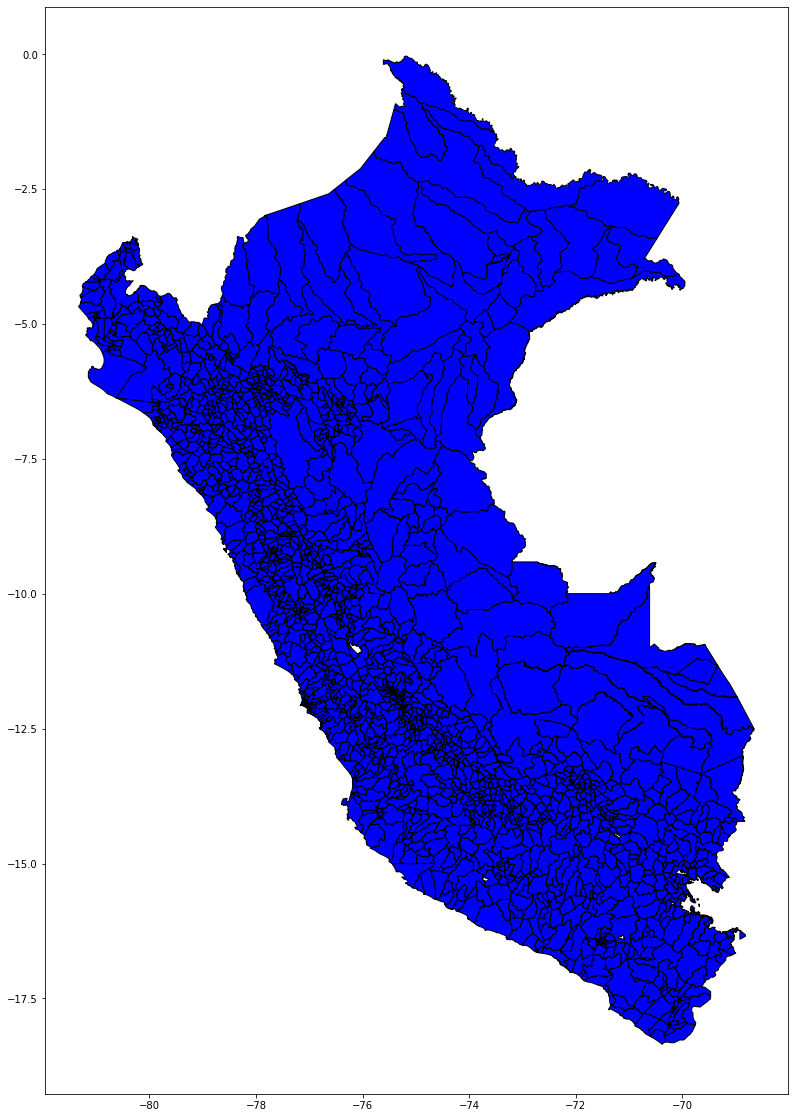

In [25]:
# Plot at district level 

fig, ax = plt.subplots(figsize=(20, 20))

maps.plot(  ax=ax, color='blue',
            edgecolor='black' )
plt.show()

## Merge: Covid Data & Shapefile distrito

In [55]:
# Merge using inner way to drop missing values 

dataset_cv = pd.merge(maps, cv_data, how="right", right_on ="UBIGEO", left_on ="IDDIST", validate = "1:m")
dataset_cv

# cv_data información de casos de covid por distrito y (años y mes), por eso el merge es 1:m

,IDDPTO,DEPARTAMEN,IDPROV,PROVINCIA,IDDIST,DISTRITO,CAPITAL,CODCCPP,AREA,FUENTE,geometry,UBIGEO,Departamento,Provincia,Distrito,Mes,Año,Casos,Muertes Covid,Muertes totales
0,01,AMAZONAS,0101,CHACHAPOYAS,010101,CHACHAPOYAS,CHACHAPOYAS,0001,1.0,INEI,"POLYGON ((-77.88323 -6.17846, -77.88071 -6.179...",010101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,3,2020,0,0,16
1,01,AMAZONAS,0101,CHACHAPOYAS,010101,CHACHAPOYAS,CHACHAPOYAS,0001,1.0,INEI,"POLYGON ((-77.88323 -6.17846, -77.88071 -6.179...",010101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,4,2020,47,0,5
2,01,AMAZONAS,0101,CHACHAPOYAS,010101,CHACHAPOYAS,CHACHAPOYAS,0001,1.0,INEI,"POLYGON ((-77.88323 -6.17846, -77.88071 -6.179...",010101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,5,2020,165,3,11
3,01,AMAZONAS,0101,CHACHAPOYAS,010101,CHACHAPOYAS,CHACHAPOYAS,0001,1.0,INEI,"POLYGON ((-77.88323 -6.17846, -77.88071 -6.179...",010101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,6,2020,119,2,15
4,01,AMAZONAS,0101,CHACHAPOYAS,010101,CHACHAPOYAS,CHACHAPOYAS,0001,1.0,INEI,"POLYGON ((-77.88323 -6.17846, -77.88071 -6.179...",010101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,7,2020,175,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40406,25,UCAYALI,2504,PURUS,250401,PURUS,ESPERANZA,0001,1.0,INEI,"POLYGON ((-70.50719 -9.42663, -70.50693 -9.426...",250401,UCAYALI,PURUS,PURUS,9,2021,0,0,0
40407,25,UCAYALI,2504,PURUS,250401,PURUS,ESPERANZA,0001,1.0,INEI,"POLYGON ((-70.50719 -9.42663, -70.50693 -9.426...",250401,UCAYALI,PURUS,PURUS,10,2021,0,0,0
40408,25,UCAYALI,2504,PURUS,250401,PURUS,ESPERANZA,0001,1.0,INEI,"POLYGON ((-70.50719 -9.42663, -70.50693 -9.426...",250401,UCAYALI,PURUS,PURUS,11,2021,0,0,2
40409,25,UCAYALI,2504,PURUS,250401,PURUS,ESPERANZA,0001,1.0,INEI,"POLYGON ((-70.50719 -9.42663, -70.50693 -9.426...",250401,UCAYALI,PURUS,PURUS,12,2021,0,0,0


In [56]:
# Function to filter dataset_covid by year, month and administrative level (province)

def subdata( a , b, c ):
    
    if c == "All-Peru":
        
        resultado = dataset_cv.loc[(dataset_cv['Año']== a) & (dataset_cv['Mes']== b)]
    else:
        resultado = dataset_cv.loc[(dataset_cv['Año']== a) & (dataset_cv['Mes']== b) & (dataset_cv['Provincia']== c)]
    return resultado  


In [57]:
#Second wave
base_lima = subdata( 2021 , 8, "LIMA")  # Lima Aug-2020

In [58]:
base_lima.shape

(43, 20)

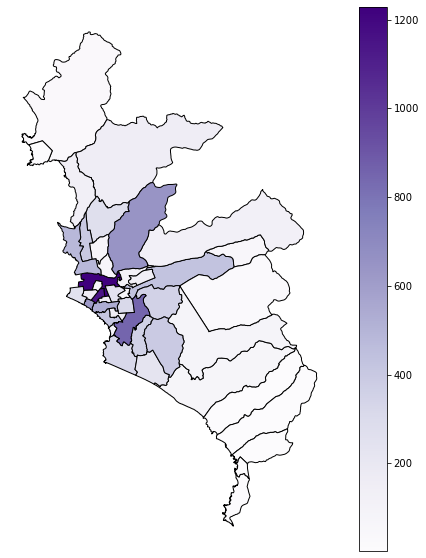

In [61]:
# Covid & Lima Matropolitana 
fig, ax = plt.subplots(figsize=(10, 10))

base_lima.plot(column='Casos', cmap='Purples', figsize=(20, 20),
                      edgecolor='black', 
                      legend = True, ax = ax)

plt.axis("off")  # sin el marco en el mapa 

# save map
plt.savefig(r'Lima_covid_Heatmap.png')

In [25]:
# Observamos el sitema de coordenadas (EPSG:4326)

base_lima.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [69]:
# Get centroid's district

base_lima['centroid'] = base_lima['geometry'].centroid

In [70]:
base_lima.head(10)

,IDDPTO,DEPARTAMEN,IDPROV,PROVINCIA,IDDIST,DISTRITO,CAPITAL,CODCCPP,AREA,FUENTE,...,UBIGEO,Departamento,Provincia,Distrito,Mes,Año,Casos,Muertes Covid,Muertes totales,centroid
27456,15,LIMA,1501,LIMA,150101,LIMA,LIMA,0001,1.0,INEI,...,150101,LIMA,LIMA,LIMA,8,2021,1228,54,255,POINT (-77.04887 -12.05103)
27479,15,LIMA,1501,LIMA,150102,ANCON,ANCON,0001,1.0,INEI,...,150102,LIMA,LIMA,ANCON,8,2021,35,4,23,POINT (-77.09581 -11.70253)
27502,15,LIMA,1501,LIMA,150103,ATE,VITARTE,0001,1.0,INEI,...,150103,LIMA,LIMA,ATE,8,2021,432,24,203,POINT (-76.87748 -12.03257)
27525,15,LIMA,1501,LIMA,150104,BARRANCO,BARRANCO,0001,1.0,INEI,...,150104,LIMA,LIMA,BARRANCO,8,2021,81,2,32,POINT (-77.02086 -12.14403)
27548,15,LIMA,1501,LIMA,150105,BREÑA,BREÑA,0001,1.0,INEI,...,150105,LIMA,LIMA,BRE<d1>A,8,2021,49,5,64,POINT (-77.05059 -12.05916)
27571,15,LIMA,1501,LIMA,150106,CARABAYLLO,CARABAYLLO,0001,1.0,INEI,...,150106,LIMA,LIMA,CARABAYLLO,8,2021,159,11,116,POINT (-76.97293 -11.80738)
27594,15,LIMA,1501,LIMA,150107,CHACLACAYO,CHACLACAYO,0001,1.0,INEI,...,150107,LIMA,LIMA,CHACLACAYO,8,2021,56,2,23,POINT (-76.76695 -11.99164)
27617,15,LIMA,1501,LIMA,150108,CHORRILLOS,CHORRILLOS,0001,1.0,INEI,...,150108,LIMA,LIMA,CHORRILLOS,8,2021,319,15,151,POINT (-77.00589 -12.19265)
27640,15,LIMA,1501,LIMA,150109,CIENEGUILLA,CIENEGUILLA,0001,1.0,INEI,...,150109,LIMA,LIMA,CIENEGUILLA,8,2021,28,0,8,POINT (-76.77753 -12.07646)
27663,15,LIMA,1501,LIMA,150110,COMAS,LA LIBERTAD,0001,1.0,INEI,...,150110,LIMA,LIMA,COMAS,8,2021,272,29,221,POINT (-77.03890 -11.92906)


## Add District Names in Centroid

(-77.22770165474995,
 -76.5919254422499,
 -12.56730783700092,
 -11.525030732977177)

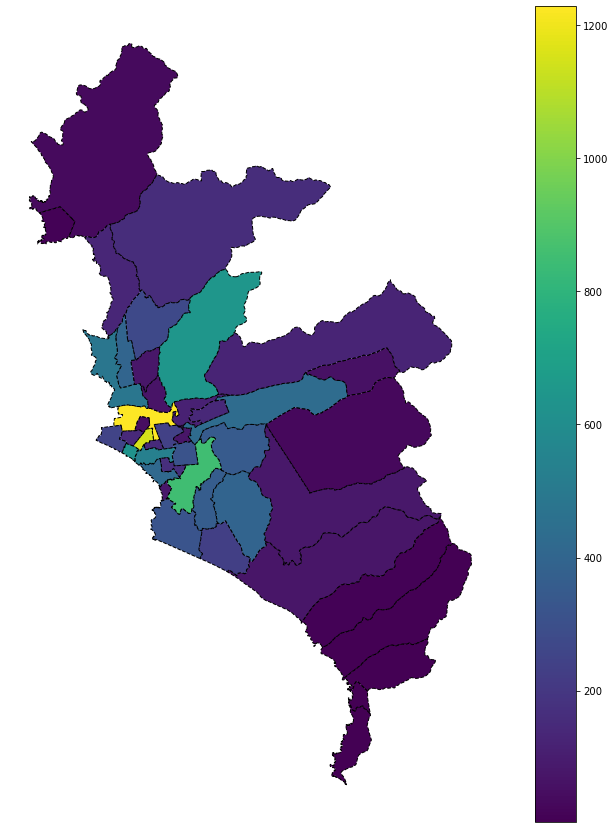

In [63]:
fig, ax = plt.subplots(figsize=(15, 15))

# Heatmap Lima and Covid infection

base_lima.plot(column='Casos', cmap='viridis', linestyle='--',
                      edgecolor='black', 
                      legend = True, ax=ax)
plt.axis("off")  # sin el marco en el mapa 

(-77.22770165474995,
 -76.5919254422499,
 -12.56730783700092,
 -11.525030732977177)

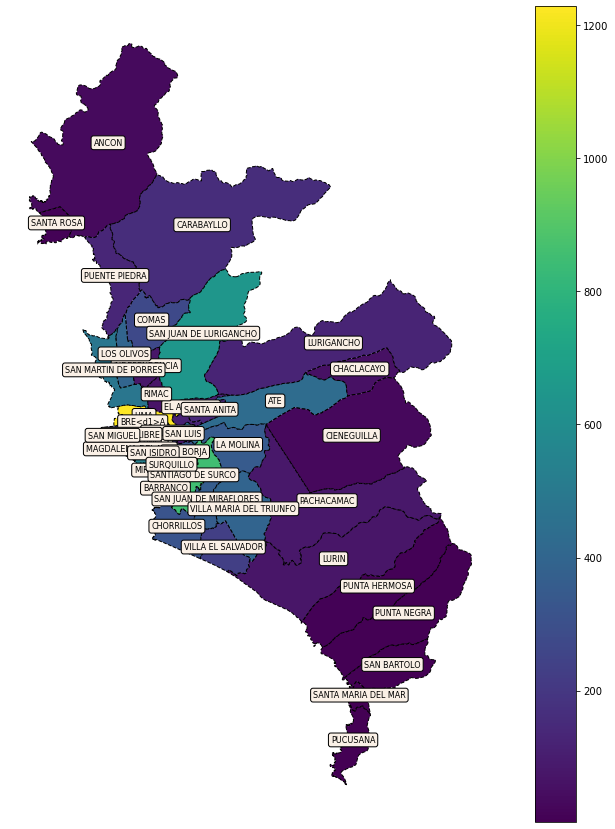

In [76]:
# Add text by district's name 

fig, ax = plt.subplots(figsize=(15, 15))

# Heatmap Lima and Covid infection

base_lima.plot(column='Casos', cmap='viridis', linestyle='--',
                      edgecolor='black', 
                      legend = True, ax=ax)

# add district name in litle box

props = dict(boxstyle='round', facecolor = 'linen', alpha =1)

for point in base_lima.iterrows():
        ax.text( point[1]['centroid'].x,
                 point[1]['centroid'].y,
                 point[1]['Distrito'],
                 horizontalalignment='center',
                 fontsize=8,
                 bbox=props )

plt.axis("off")  # sin el marco en el mapa

In [28]:
props = dict(boxstyle='round', facecolor = 'linen', alpha =1)
props

{'boxstyle': 'round', 'facecolor': 'linen', 'alpha': 1}

In [29]:
# check distric's name 
for point in base_lima.iterrows():
    print(point[1]['Distrito'])

LURIN
ANCON
SAN ISIDRO
MAGDALENA DEL MAR
SAN BORJA
LINCE
SANTIAGO DE SURCO
PUEBLO LIBRE
SANTA ROSA
CARABAYLLO
JESUS MARIA
PUCUSANA
SANTA MARIA DEL MAR
CHORRILLOS
BARRANCO
VILLA MARIA DEL TRIUNFO
SAN JUAN DE MIRAFLORES
MIRAFLORES
SURQUILLO
PUNTA NEGRA
SAN LUIS
SAN MIGUEL
VILLA EL SALVADOR
PUNTA HERMOSA
SAN BARTOLO
PACHACAMAC
LA VICTORIA
LA MOLINA
BRE<d1>A
SANTA ANITA
CIENEGUILLA
LIMA
EL AGUSTINO
RIMAC
ATE
CHACLACAYO
INDEPENDENCIA
SAN MARTIN DE PORRES
LOS OLIVOS
COMAS
LURIGANCHO
SAN JUAN DE LURIGANCHO
PUENTE PIEDRA


In [65]:
# Postas Médicas and Hospitales públicos - LIMA

PH_lima_postas = Public_health1[Public_health1.Provincia == "LIMA"]

PH_lima_hospitales = Public_health2[Public_health2.Provincia == "LIMA"]
PH_lima_hospitales

,Institución,Código Único,Nombre del establecimiento,Clasificación,Tipo,Departamento,Provincia,Distrito,UBIGEO,Dirección,...,Situación,Condición,Inspección,NORTE,ESTE,COTA,CAMAS,code1,code2,geometry
2715,MINSA,5814,CENTRO DE SALUD MATERNO INFANTIL ANCON,CENTROS DE SALUD CON CAMAS DE INTERNAMIENTO,ESTABLECIMIENTO DE SALUD CON INTERNAMIENTO,LIMA,LIMA,ANCON,150102,JR. LOA 595 ANCON,...,,EN FUNCIONAMIENTO,,-77.172725,-11.774719,12.0,NaN,24,3,POINT (-77.17272 -11.77472)
2803,MINSA,5816,MATERNO INFANTIL DR. ENRIQUE MARTIN ALTUNA,CENTROS DE SALUD CON CAMAS DE INTERNAMIENTO,ESTABLECIMIENTO DE SALUD CON INTERNAMIENTO,LIMA,LIMA,PUENTE PIEDRA,150125,ASOC VIV E INDUSTRIAS VIRGEN DE LAS NIEVES URB...,...,,EN FUNCIONAMIENTO,,-77.109100,-11.837611,200.0,NaN,24,3,POINT (-77.10910 -11.83761)
2832,ESSALUD,8564,HOSPITAL I OCTAVIO MONGRUT MUÑOZ,HOSPITALES O CLINICAS DE ATENCION GENERAL,ESTABLECIMIENTO DE SALUD CON INTERNAMIENTO,LIMA,LIMA,SAN MIGUEL,150136,AV PARQUE DE LAS LEYENDAS 255,...,,EN FUNCIONAMIENTO,,-77.094583,-12.065961,NaN,49.0,12,3,POINT (-77.09458 -12.06596)
2852,MINSA,5817,SANTA ROSA,CENTROS DE SALUD CON CAMAS DE INTERNAMIENTO,ESTABLECIMIENTO DE SALUD CON INTERNAMIENTO,LIMA,LIMA,PUENTE PIEDRA,150125,"AA.HH. SANTA ROSA, MZ. 50, LOTE PM - AV. SANTA...",...,,EN FUNCIONAMIENTO,,-77.081693,-11.874827,200.0,NaN,24,3,POINT (-77.08169 -11.87483)
2859,MINSA,7632,HOSPITAL CARLOS LANFRANCO LA HOZ,HOSPITALES O CLINICAS DE ATENCION GENERAL,ESTABLECIMIENTO DE SALUD CON INTERNAMIENTO,LIMA,LIMA,PUENTE PIEDRA,150125,AV. SAENZ PEÑA - CUADRA 6 S/N,...,,EN FUNCIONAMIENTO,,-77.079335,-11.863181,NaN,102.0,12,3,POINT (-77.07934 -11.86318)
2862,MINSA,5799,CLAS JUAN PABLO II,CENTROS DE SALUD CON CAMAS DE INTERNAMIENTO,ESTABLECIMIENTO DE SALUD CON INTERNAMIENTO,LIMA,LIMA,LOS OLIVOS,150117,CALLE 28 S/N AA.HH. JUAN PABLO II,...,,EN FUNCIONAMIENTO,,-77.078891,-11.953212,63.0,NaN,24,3,POINT (-77.07889 -11.95321)
2875,MINSA,5821,LOS SUREÑOS,CENTROS DE SALUD CON CAMAS DE INTERNAMIENTO,ESTABLECIMIENTO DE SALUD CON INTERNAMIENTO,LIMA,LIMA,PUENTE PIEDRA,150125,COOP. VIVIENDA LOS SUREÑOS MZ M LT. 35,...,,EN FUNCIONAMIENTO,,-77.069701,-11.887532,200.0,NaN,24,3,POINT (-77.06970 -11.88753)
2879,MINSA,6196,MAGDALENA,CENTROS DE SALUD CON CAMAS DE INTERNAMIENTO,ESTABLECIMIENTO DE SALUD CON INTERNAMIENTO,LIMA,LIMA,MAGDALENA DEL MAR,150120,JR. JUNÍN 322,...,,EN FUNCIONAMIENTO,,-77.068627,-12.088694,27.0,NaN,24,3,POINT (-77.06863 -12.08869)
2887,MINSA,6214,HOSPITAL VICTOR LARCO HERRERA,HOSPITALES O CLINICAS DE ATENCION GENERAL,ESTABLECIMIENTO DE SALUD CON INTERNAMIENTO,LIMA,LIMA,MAGDALENA DEL MAR,150120,AV.AUGUSTO PEREZ ARANIBAR N° 600,...,,EN FUNCIONAMIENTO,,-77.065756,-12.098705,NaN,590.0,12,3,POINT (-77.06576 -12.09871)
2904,MINSA,5772,CENTRO MATERNO INFANTIL SANTA LUZMILA II,CENTROS DE SALUD CON CAMAS DE INTERNAMIENTO,ESTABLECIMIENTO DE SALUD CON INTERNAMIENTO,LIMA,LIMA,COMAS,150110,AVENIDA AV. 22 DE AGOSTO N° 1001- URB SANTA LU...,...,,EN FUNCIONAMIENTO,,-77.058712,-11.947025,101.0,NaN,24,3,POINT (-77.05871 -11.94703)


## Covid y Postas en Lima (situación)

In [34]:
PH_lima_postas

,Institución,Código Único,Nombre del establecimiento,Clasificación,Tipo,Departamento,Provincia,Distrito,UBIGEO,Dirección,...,Situación,Condición,Inspección,NORTE,ESTE,COTA,CAMAS,code1,code2,geometry
2725,MINSA,5824,SAN JOSE,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,LIMA,LIMA,ANCON,150102,ESQ. CALLE Nº 17 Y CALLE Nº 9 URB. DE INTERES ...,...,,EN FUNCIONAMIENTO,,-77.162575,-11.778237,12.0,NaN,19,1,POINT (-77.16258 -11.77824)
2728,MINSA,14727,PROFAM,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,LIMA,LIMA,SANTA ROSA,150139,"AV. SANTA ROSA, MANZANA O-2 / ASOCIACION DE VI...",...,,EN FUNCIONAMIENTO,,-77.159128,-11.817327,NaN,NaN,19,1,POINT (-77.15913 -11.81733)
2740,MINSA,16525,VILLAS DE ANCON,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,LIMA,LIMA,ANCON,150102,MZ X ASOCIACION PRO-VIVIENDA VILLAS DE ANCON,...,,EN FUNCIONAMIENTO,,-77.145966,-11.733970,0.0,NaN,19,1,POINT (-77.14597 -11.73397)
2762,MINSA,5825,VIRGEN DE LAS MERCEDES,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,LIMA,LIMA,SANTA ROSA,150139,ASOC. VIV. SANTA ROSA MZ. B LT. 09,...,,EN FUNCIONAMIENTO,,-77.131677,-11.815250,12.0,NaN,19,1,POINT (-77.13168 -11.81525)
2797,MINSA,5750,CERRO LA REGLA,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,LIMA,LIMA,SAN MARTIN DE PORRES,150135,"MZ B LT 11 - AAHH ESPERANZA, COMITÉ 2",...,,EN FUNCIONAMIENTO,,-77.115765,-11.989613,123.0,NaN,19,1,POINT (-77.11576 -11.98961)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3486,MINSA,5868,SEÑOR DE LOS MILAGROS,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,LIMA,LIMA,LURIGANCHO,150118,AVENIDA AV.PRECURSORES S/N AAHH NICOLAS DE PIE...,...,,EN FUNCIONAMIENTO,,-76.714793,-11.935857,911.0,NaN,19,1,POINT (-76.71479 -11.93586)
3516,MINSA,5870,PABLO PATRON,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,LIMA,LIMA,LURIGANCHO,150118,AAHH PABLO PATRON - CALLE 14 MZ. V LOTE 7 DIST...,...,,EN FUNCIONAMIENTO,,-76.686205,-11.930408,911.0,NaN,19,1,POINT (-76.68621 -11.93041)
3519,MINSA,5867,MARISCAL CASTILLA,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,LIMA,LIMA,LURIGANCHO,150118,CALLE SANTA ROSA MZ O S/N - AAHH MARISCAL CAST...,...,,EN FUNCIONAMIENTO,,-76.685491,-11.933911,911.0,NaN,19,1,POINT (-76.68549 -11.93391)
8125,MINSA,5940,HUASCATA,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,LIMA,LIMA,CHACLACAYO,150107,OTROS MZ N LOTE 05 AAHH CERRO VECINO HUASCATA-...,...,,EN FUNCIONAMIENTO,,NaN,NaN,NaN,NaN,19,1,POINT EMPTY


(-77.22770165474995,
 -76.5919254422499,
 -12.56730783700092,
 -11.525030732977177)

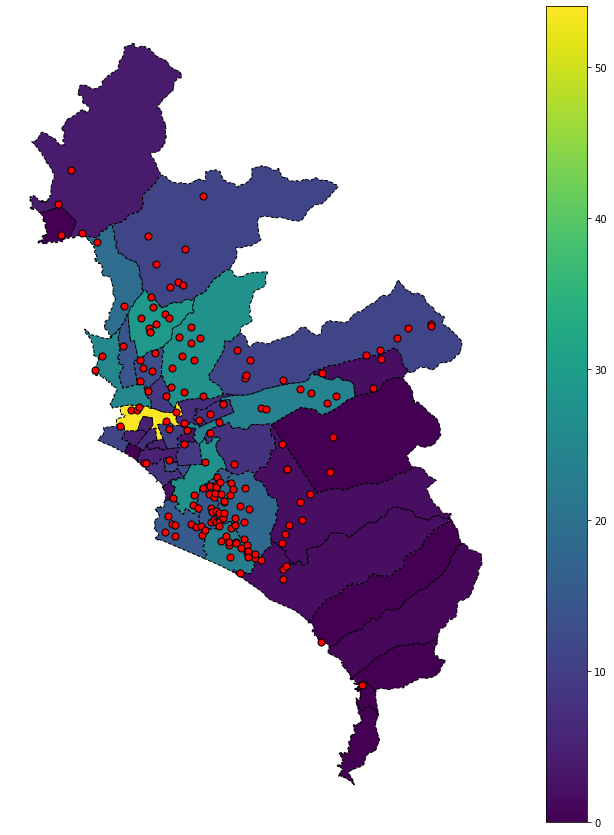

In [68]:
# Covid deaths and Postas médicas 

fig, ax = plt.subplots(figsize=(15, 15))

#Heatmap Lima and Covid infection

base_lima.plot( column='Muertes Covid', 
               cmap='viridis', 
               linestyle='--',
               edgecolor='black', 
               legend = True, 
               ax=ax )

PH_lima_postas.plot(ax = ax, color = 'red', markersize=50, edgecolor='black')
plt.axis("off")  # sin el marco en el mapa

## Hospitales Públicos y Postas Médicas

(-77.22770165474995,
 -76.5919254422499,
 -12.56730783700092,
 -11.525030732977177)

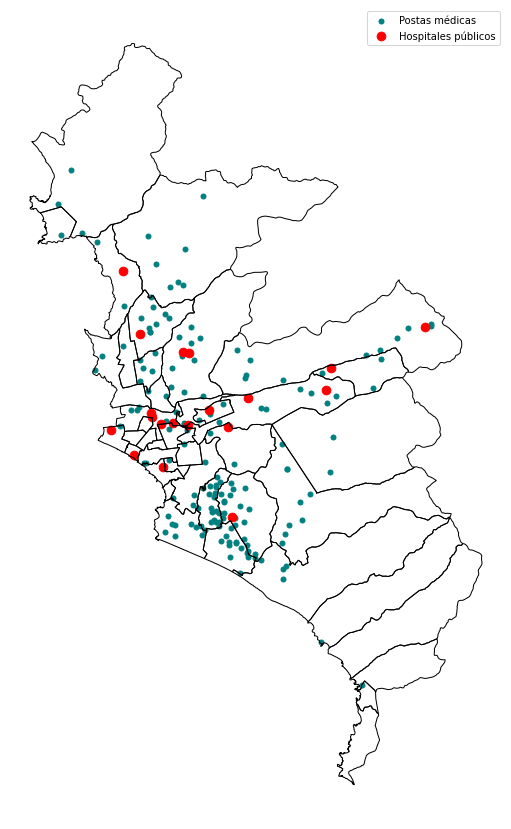

In [92]:
# Plot de Postas and Hospital 
fig, ax = plt.subplots(figsize=(15, 15))

base_lima.plot(figsize=(15, 15), 
                    color='none',
                    edgecolor='black',
                   ax = ax,  # permite ubicar gráficos en misma imagen 
                    zorder=3)

PH_lima_postas.plot(color='teal', 
                    label = "Postas médicas", 
                    markersize=25, 
                    ax=ax)
PH_lima_hospitales.plot(color='red', 
                        label = "Hospitales públicos", 
                        markersize=75,
                        ax=ax)

plt.legend(loc='upper right')
plt.axis("off")  # sin el marco en el mapa

(-77.22770165474995,
 -76.5919254422499,
 -12.56730783700092,
 -11.525030732977177)

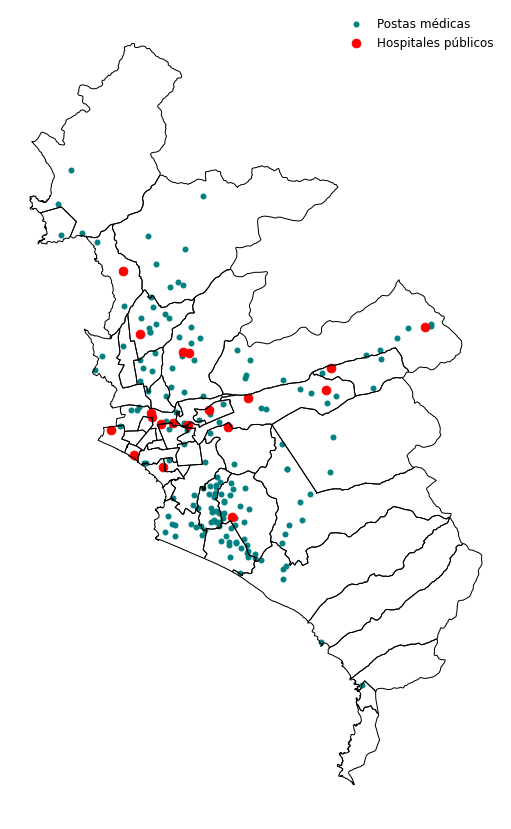

In [113]:
# Plot de Postas anh Hospital 

ax = base_lima.plot(figsize=(15, 15), color='none', edgecolor='black', zorder=3)

PH_lima_postas.plot(color='teal', 
                    label = "Postas médicas",
                    markersize=25, ax=ax)
PH_lima_hospitales.plot(color='red', 
                        label = "Hospitales públicos",
                        markersize=75, ax=ax)

plt.legend(loc='upper right', frameon=False, prop={'size': 12}) # frameon=False sin marco en la leyenda, prop : size : tamaño de la leyenda
plt.axis("off")  # sin el marco en el mapa

(-77.22770165474995,
 -76.5919254422499,
 -12.56730783700092,
 -11.525030732977177)

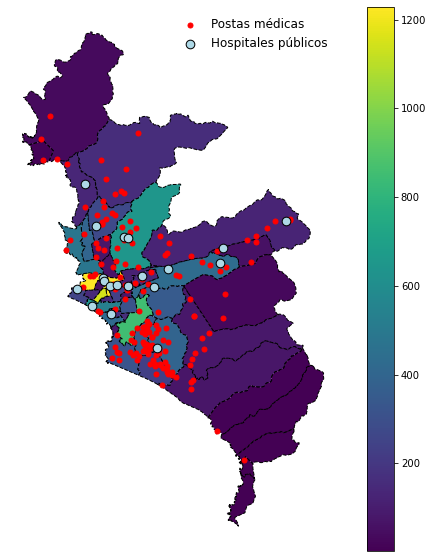

In [123]:
# Covid infection and Postas médicas 

fig, ax = plt.subplots(figsize=(10, 10))

#Heatmap Lima and Covid infection

base_lima.plot(column='Casos', 
               cmap='viridis', 
               linestyle='--',
                      edgecolor='black',
                      legend = True, ax=ax)

PH_lima_postas.plot(color='red', 
                    label = "Postas médicas", 
                    markersize=25, 
                    ax=ax)
PH_lima_hospitales.plot(color='lightblue', 
                        label = "Hospitales públicos", 
                        markersize=75,
                        ax=ax,
                        edgecolor = "black")

plt.legend(loc='upper right', frameon=False, prop={'size': 12})
plt.axis("off")  # sin el marco en el mapa

## Relative Size of Markers from panda series

In [78]:
# drop raws with nan values 

PH_lima_hospitales = PH_lima_hospitales.dropna(subset=['CAMAS'])

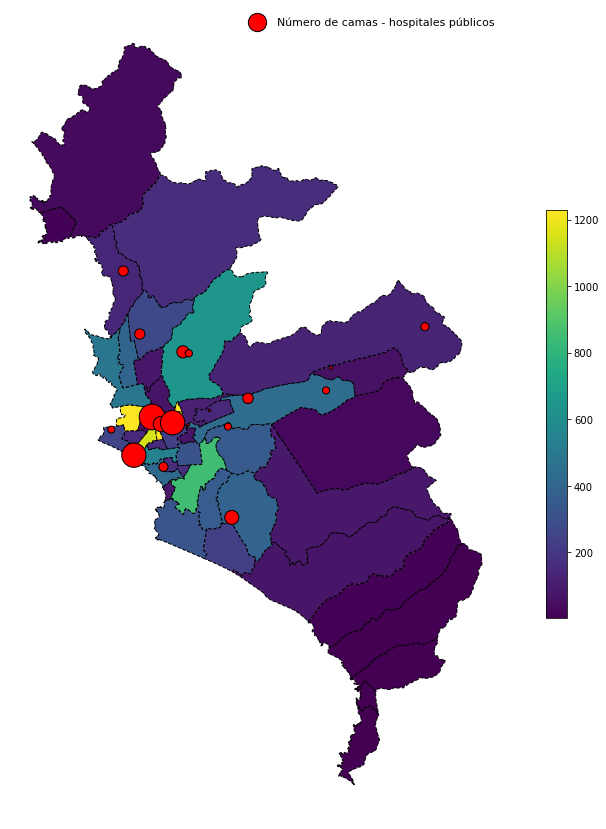

In [129]:
# Covid infection and Public Hospital by number of beds 

fig, ax = plt.subplots(figsize=(15, 15))

markersize=PH_lima_hospitales['CAMAS']

#Heatmap Lima and Covid infection

base_lima.plot(column='Casos', cmap='viridis', 
               linestyle='--',
                      edgecolor='black', legend = True,
                      legend_kwds={'shrink': 0.5}, ax=ax)  # shrinl: encoger las dimensiones de la barra 

PH_lima_hospitales.plot( ax=ax, color='red',
                        label = "Número de camas - hospitales públicos",
                        markersize = markersize,
                       edgecolor='black')

plt.axis("off")  # sin el marco en el mapa
plt.legend(loc='upper right', frameon=False, prop={'size': 11})